In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,cross_validate
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv('winequality-red.csv')

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
features=[feature for feature in data.columns if feature != 'quality']

C:\Users\KARTIK\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\KARTIK\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\KARTIK\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\KARTIK\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\KARTIK\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\KARTIK\anaconda3\lib\site-packa

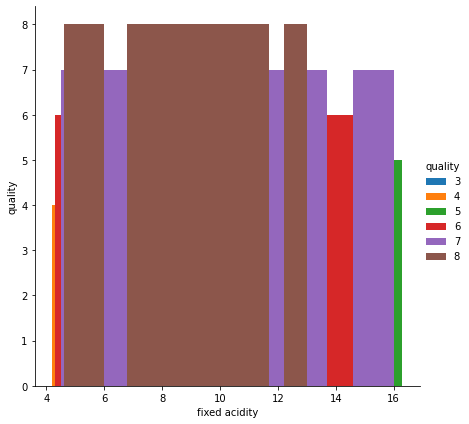

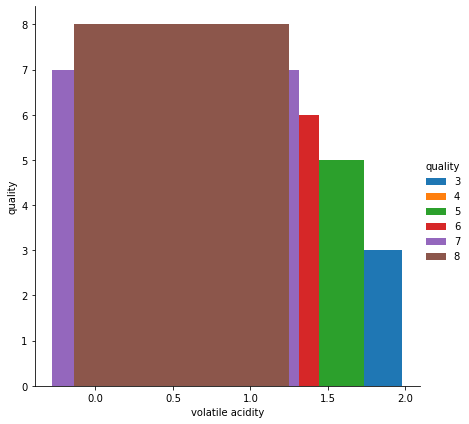

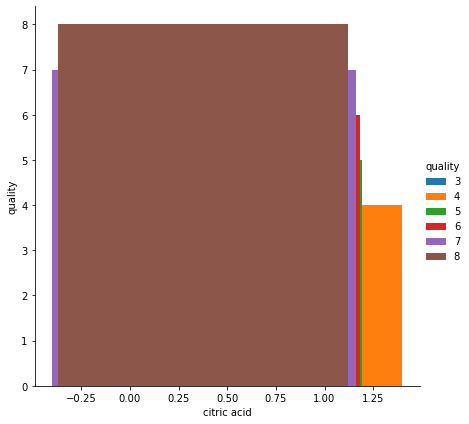

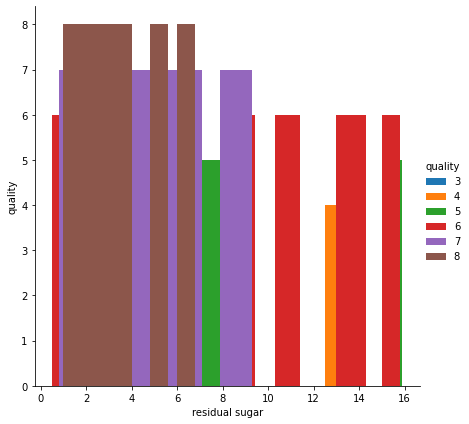

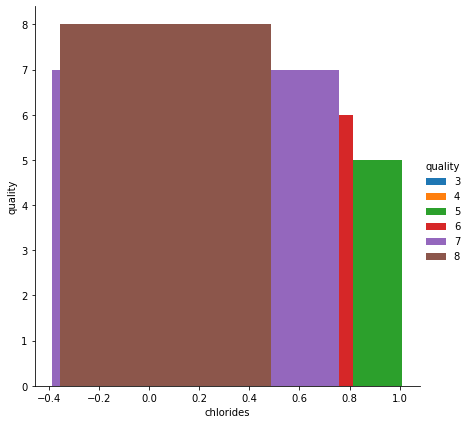

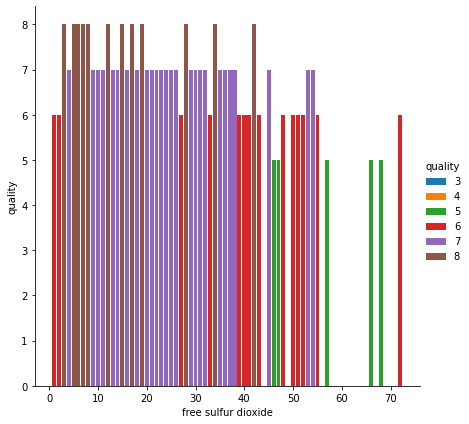

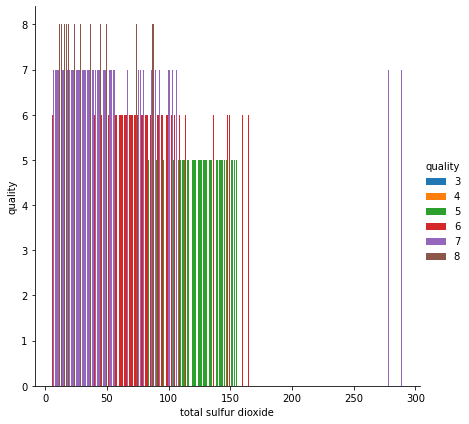

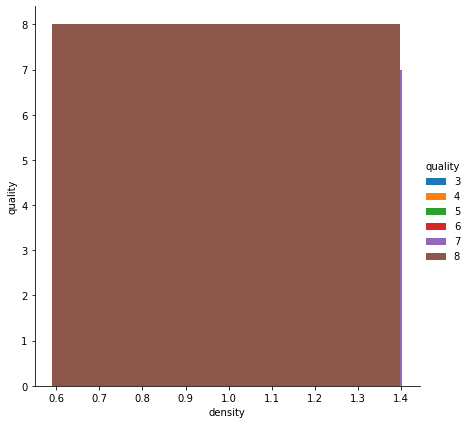

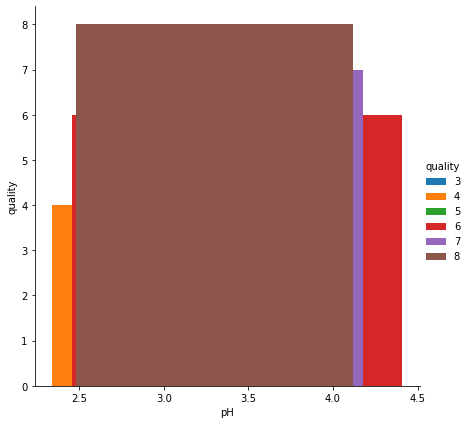

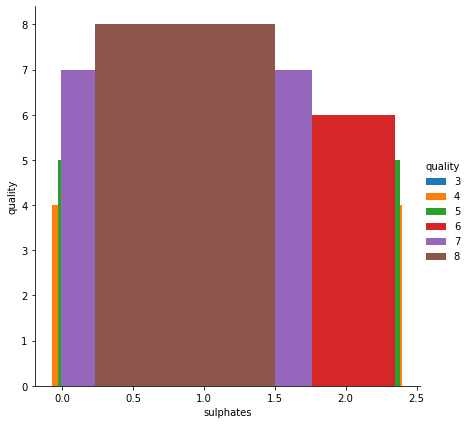

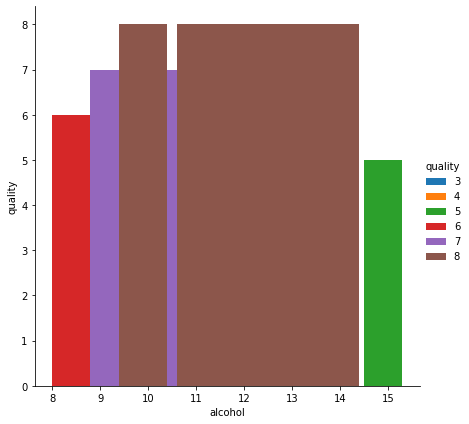

In [7]:
for feature in features:
    #sns.barplot(x=data[feature],y=data['quality'],data=data)
    sns.FacetGrid(data=data,hue="quality",size=6).map(plt.bar, feature, "quality").add_legend()

C:\Users\KARTIK\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\KARTIK\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\KARTIK\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\KARTIK\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distp

C:\Users\KARTIK\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\KARTIK\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\KARTIK\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\KARTIK\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distp

C:\Users\KARTIK\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\KARTIK\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\KARTIK\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\KARTIK\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distp

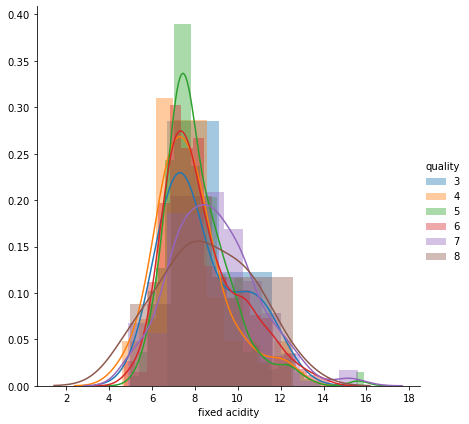

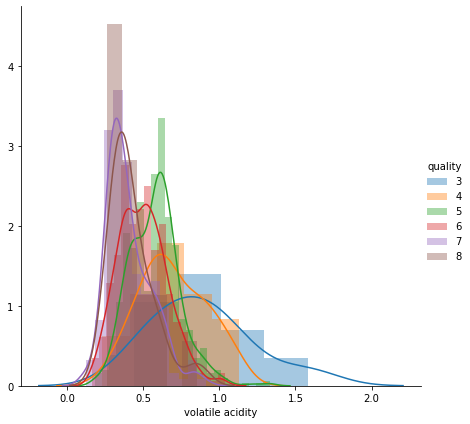

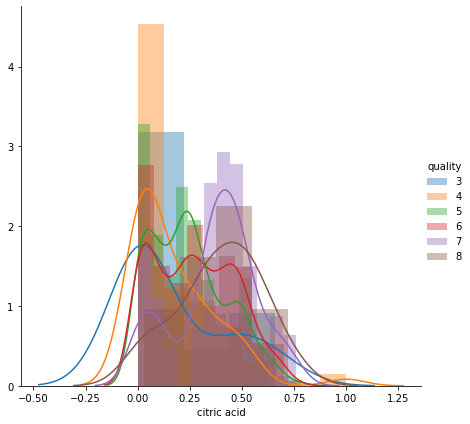

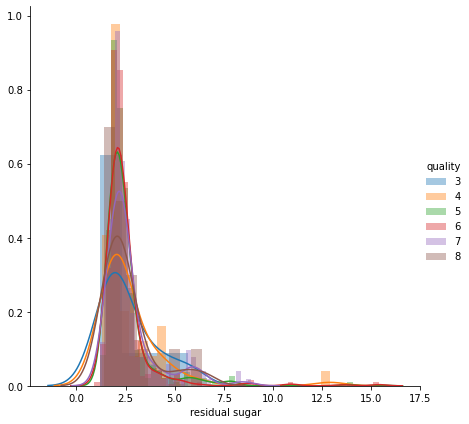

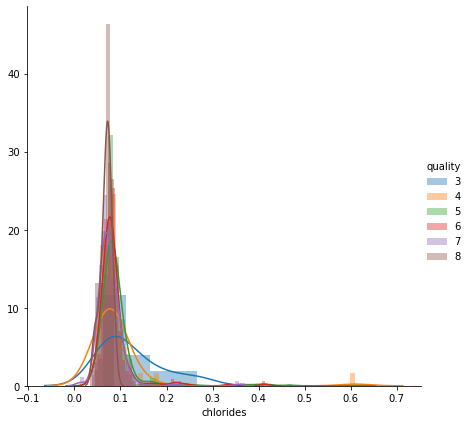

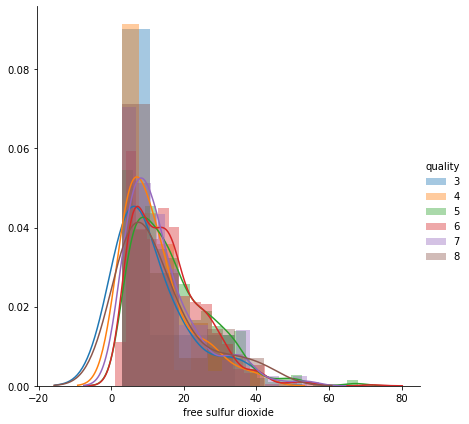

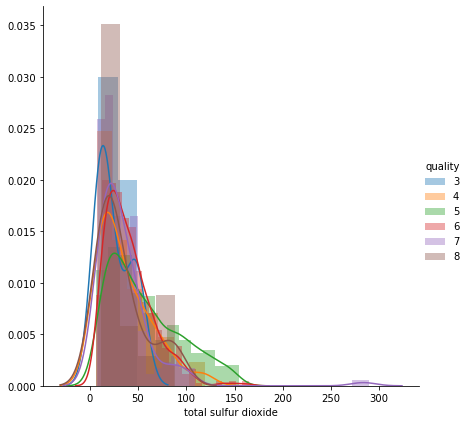

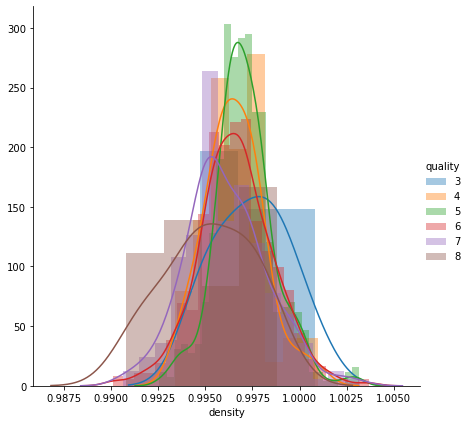

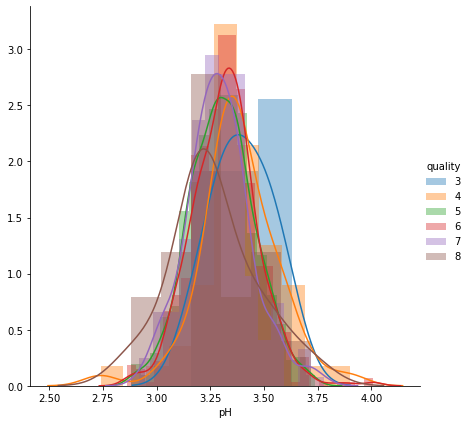

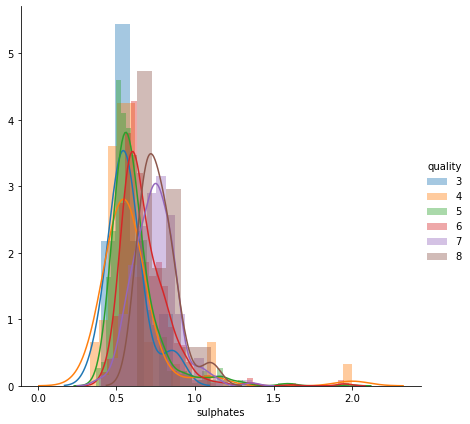

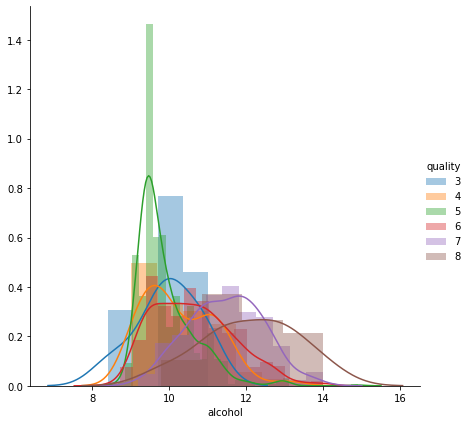

In [8]:
for feature in features:
    sns.FacetGrid(data,hue='quality',size=6).map(sns.distplot,feature).add_legend()

<AxesSubplot:ylabel='quality'>

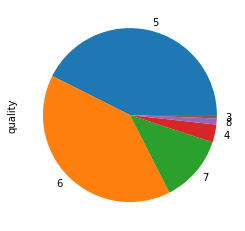

In [9]:
data["quality"].value_counts().plot(kind="pie")


C:\Users\KARTIK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

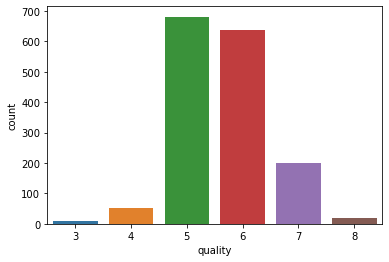

In [10]:
sns.countplot(data["quality"])

C:\Users\KARTIK\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\KARTIK\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\KARTIK\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\KARTIK\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\KARTIK\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warn

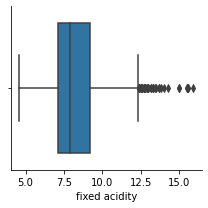

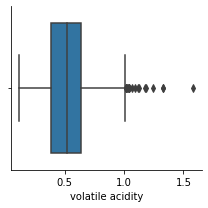

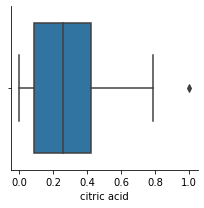

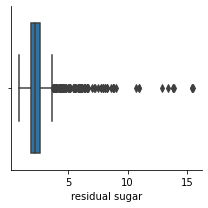

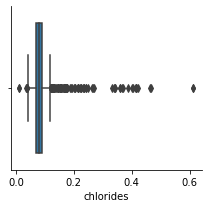

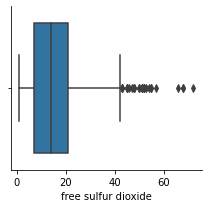

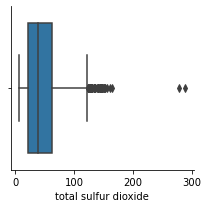

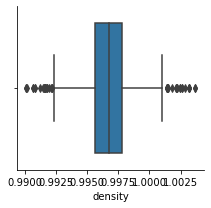

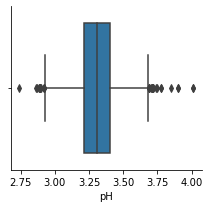

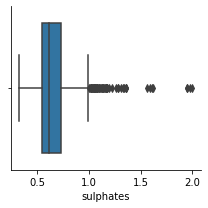

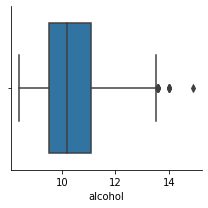

In [11]:
for feature in features:
    sns.FacetGrid(data).map(sns.boxplot,feature)

In [12]:
corr_data=data.corr()

<AxesSubplot:>

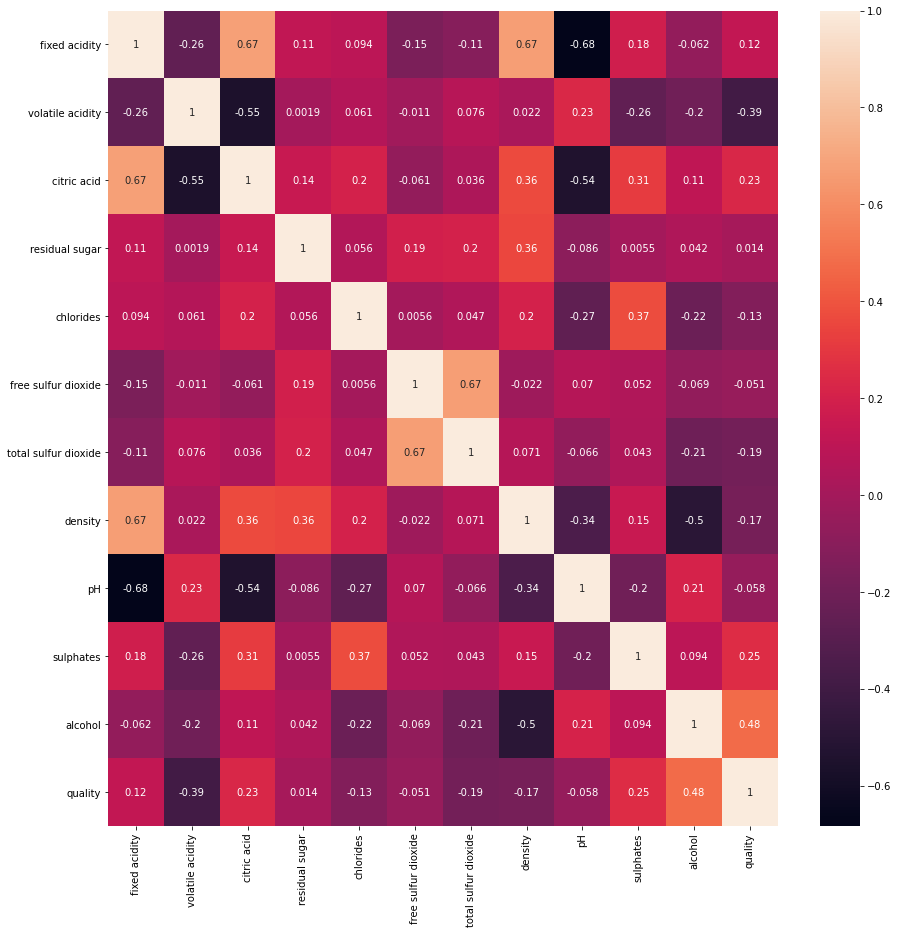

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(corr_data,annot=True)

from above figure:
#fixed acidity is positively correlated with citric acid, density
#fixed acidity is negatively correlated with density and pH

<AxesSubplot:xlabel='fixed acidity', ylabel='pH'>

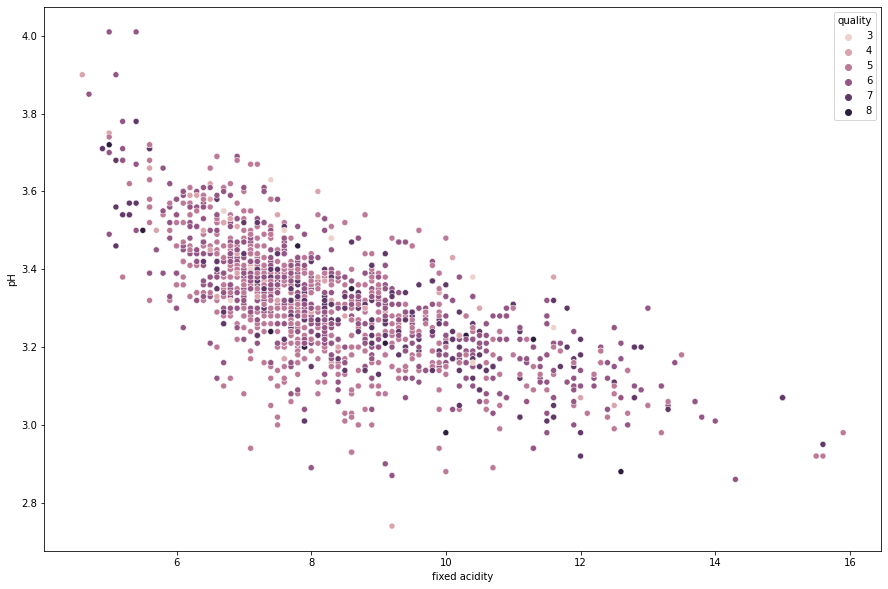

In [14]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=data,x="fixed acidity",y="pH",hue="quality")

<AxesSubplot:xlabel='fixed acidity', ylabel='citric acid'>

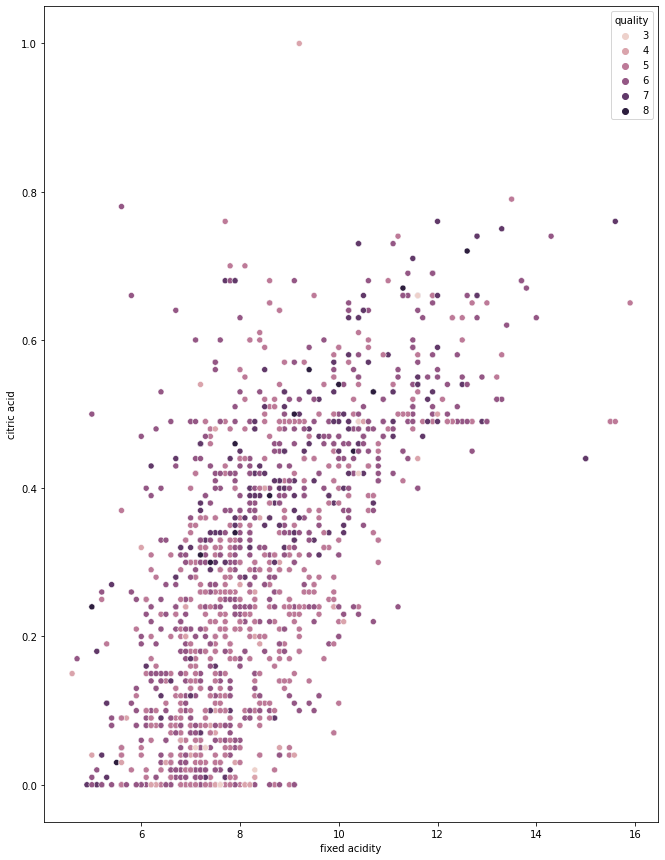

In [15]:
plt.figure(figsize=(11,15))
sns.scatterplot(data=data,x="fixed acidity",y="citric acid",hue="quality")

<AxesSubplot:xlabel='fixed acidity', ylabel='density'>

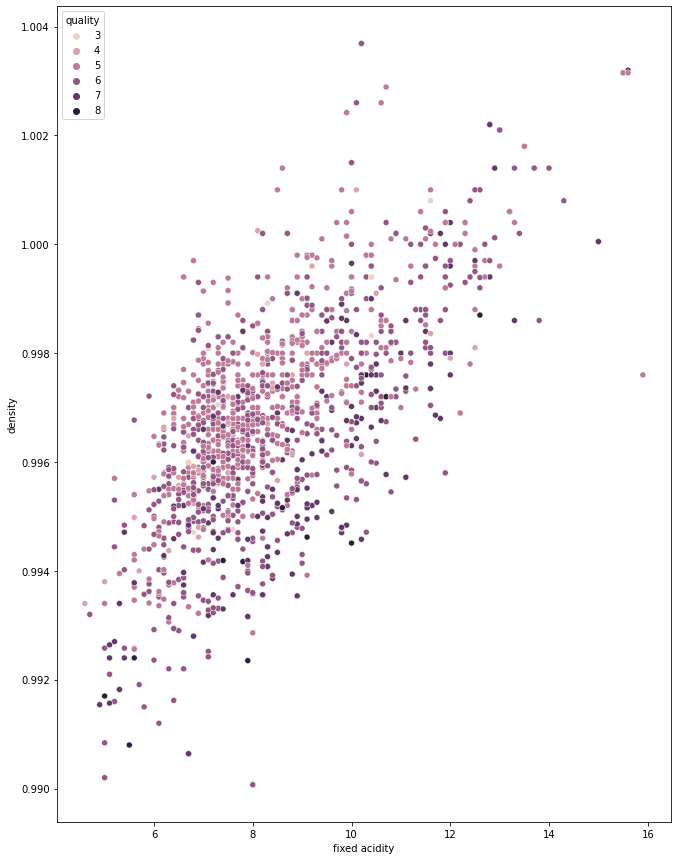

In [16]:
plt.figure(figsize=(11,15))
sns.scatterplot(data=data,x="fixed acidity",y="density",hue="quality")

<AxesSubplot:xlabel='fixed acidity', ylabel='alcohol'>

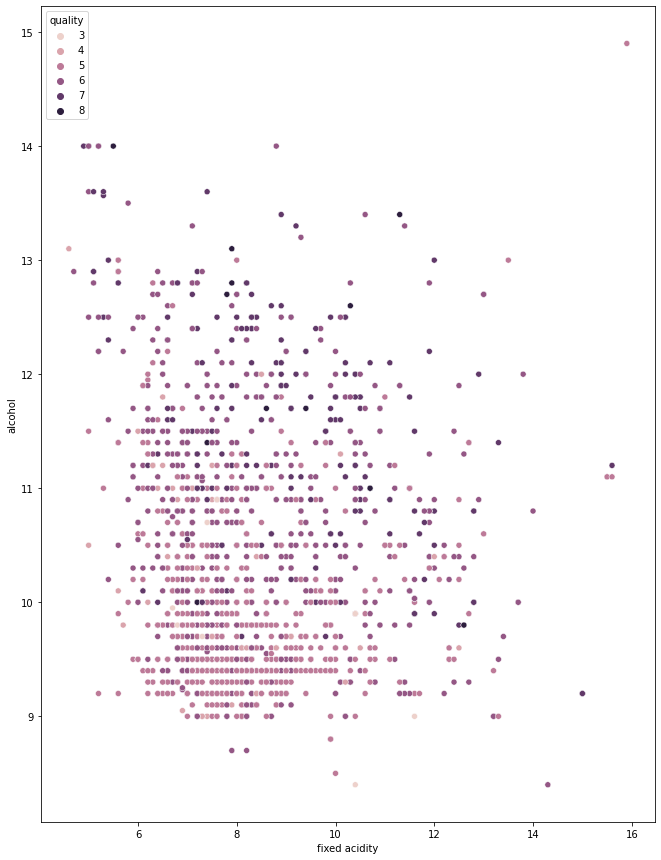

In [17]:
plt.figure(figsize=(11,15))
sns.scatterplot(data=data,x="fixed acidity",y="alcohol",hue="quality")

<AxesSubplot:xlabel='quality', ylabel='density'>

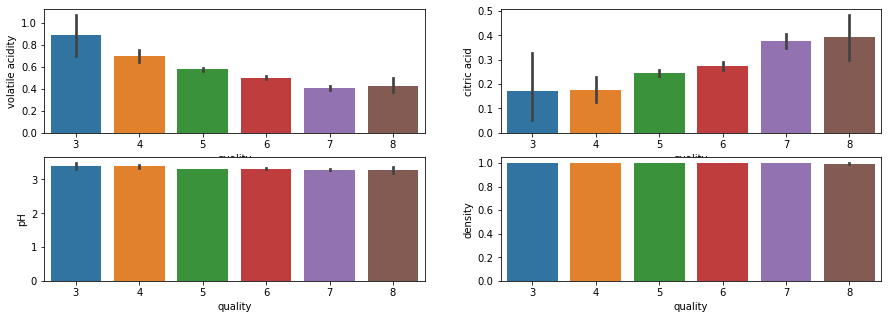

In [18]:
fig = plt.figure(figsize=(15,5))
plt.subplot(221)
sns.barplot(data =data,x ='quality',y = 'volatile acidity')
plt.subplot(222)
sns.barplot(data =data,x ='quality',y = 'citric acid')
plt.subplot(223)
sns.barplot(data =data,x ='quality',y = 'pH')
plt.subplot(224)
sns.barplot(data =data,x ='quality',y = 'density')

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le=LabelEncoder()

In [21]:
my_bins = (2, 6.5, 8)
groups = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = my_bins, labels = groups)

In [22]:
data['quality'].unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [23]:
data['quality']=le.fit_transform(data['quality'])

In [24]:
data['quality'].unique()

array([0, 1])

<AxesSubplot:ylabel='quality'>

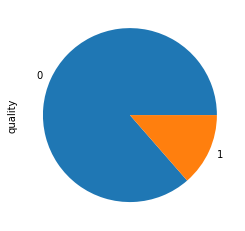

In [25]:
data['quality'].value_counts().plot(kind="pie")

In [26]:
X=data.iloc[:,:-1]
X_data=X.copy()

In [27]:
Y=data.quality

In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=13)

In [29]:
scores=cross_val_score(RandomForestClassifier(),X,Y)
scores.mean()

0.865546630094044

In [30]:
model=RandomForestClassifier()
cv=cross_validate(estimator=model,X=X,y=Y,cv=5,n_jobs=4)
cv['test_score'].mean()

0.8730485893416928

In [31]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [32]:
predicted=model.predict(X_test)

In [33]:
#Check the importance of each feature
for name, score in zip(X_data.columns, model.feature_importances_):
    print(name, score *100)

fixed acidity 7.832619683689256
volatile acidity 11.087668100025235
citric acid 7.785456061550347
residual sugar 6.502567946193391
chlorides 6.448020091623695
free sulfur dioxide 6.054161044517124
total sulfur dioxide 7.606553273411796
density 10.507207113028965
pH 5.776828448262523
sulphates 11.731980908340839
alcohol 18.66693732935682


<AxesSubplot:xlabel='Features', ylabel='%Importance'>

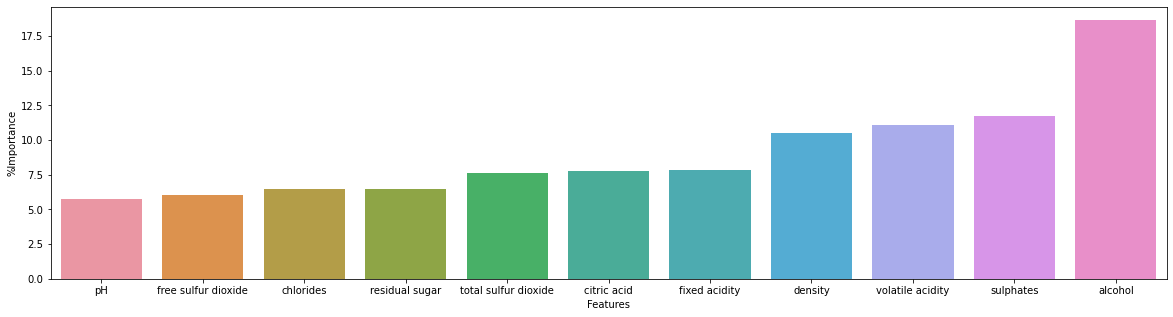

In [34]:
#visualise the same
visual = {'Features': X.columns , '%Importance': model.feature_importances_ * 100 }
temp = pd.DataFrame(visual)

plt.figure(figsize =(20,5))
sns.barplot(data =temp.sort_values(by =['%Importance']) ,x='Features', y ='%Importance')

In [52]:
X=data.drop(columns="quality")
X.shape

(1599, 11)

In [53]:
Y=data.quality
Y.shape

(1599,)

In [56]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state =123)


In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
sc = StandardScaler()
X=sc.fit_transform(X)

In [40]:
dict_score=dict()

In [41]:
#RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
scores=cross_val_score(RandomForestClassifier(),X,Y)
print("Random_forest scores:",scores.mean())
dict_score.update({'Random_forest':scores.mean()})

Random_forest scores: 0.8655427115987461


In [42]:
scores=cross_val_score(GradientBoostingClassifier(),X,Y)
print("Gradient_Boost scores:",scores.mean())
dict_score.update({'Gradient_Boost':scores.mean()})

Gradient_Boost scores: 0.8667966300940438


In [43]:
scores=cross_val_score(AdaBoostClassifier(),X,Y)
print("Ada_Boost scores:",scores.mean())
dict_score.update({'Ada_Boost':scores.mean()})

Ada_Boost scores: 0.8580387931034483


In [44]:
scores=cross_val_score(KNeighborsClassifier(),X,Y)
print("KNN scores:",scores.mean())
dict_score.update({'KNN':scores.mean()})

KNN scores: 0.8417848746081505


In [45]:
scores=cross_val_score(GaussianNB(),X,Y)
print("Gaussian_NB scores:",scores.mean())
dict_score.update({'Gaussian_NB':scores.mean()})

Gaussian_NB scores: 0.8067985893416928


In [46]:
scores=cross_val_score(LogisticRegression(),X,Y)
print("Logistic scores:",scores.mean())
dict_score.update({'Logistic':scores.mean()})

Logistic scores: 0.8674275078369906


In [47]:
scores=cross_val_score(SVC(),X,Y)
print("Support_vector_machine scores:",scores.mean())
dict_score.update({'Support_vector_machine':scores.mean()})

Support_vector_machine scores: 0.8692927115987461


In [48]:
score=pd.DataFrame(dict_score.items(),columns=['Name','Score'])

In [49]:
score

,Name,Score
0,Random_forest,0.865543
1,Gradient_Boost,0.866797
2,Ada_Boost,0.858039
3,KNN,0.841785
4,Gaussian_NB,0.806799
5,Logistic,0.867428
6,Support_vector_machine,0.869293


In [86]:
#without transformation
model=RandomForestClassifier()
model.fit(X_train,Y_train)
accuracy_score(Y_test,model.predict(X_test))

0.9

In [87]:
model=GradientBoostingClassifier()
model.fit(X_train,Y_train)
accuracy_score(Y_test,model.predict(X_test))

0.890625

In [88]:
model=KNeighborsClassifier()
model.fit(X_train,Y_train)
accuracy_score(Y_test,model.predict(X_test))

0.8375

In [89]:
model=AdaBoostClassifier()
model.fit(X_train,Y_train)
accuracy_score(Y_test,model.predict(X_test))

0.878125

In [90]:
model=SVC()
model.fit(X_train,Y_train)
accuracy_score(Y_test,model.predict(X_test))

0.865625

In [91]:
model=LogisticRegression()
model.fit(X_train,Y_train)
accuracy_score(Y_test,model.predict(X_test))

C:\Users\KARTIK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.865625

In [92]:
model=GaussianNB()
model.fit(X_train,Y_train)
accuracy_score(Y_test,model.predict(X_test))

0.840625

In [81]:
import pickle

In [85]:
model=RandomForestClassifier()
model.fit(X_train,Y_train)
accuracy_score(Y_test,model.predict(X_test))
filename='RandomForest.sav'
pickle.dump(model,open(filename,'wb'))